In [100]:
#read necessary datas and import useful libraries

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
spray=pd.read_csv('spray.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
weather=pd.read_csv('weather.csv')


In [101]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [102]:
spray.head(1)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163


In [103]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [104]:
spray.head(2)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [105]:
test.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [106]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
dtype: int64

In [107]:
#assign numbers for each mosquito species
train['Species_num'] = train.Species.map({'CULEX PIPIENS/RESTUANS':0, 'CULEX RESTUANS':1, 'CULEX PIPIENS':2, 'CULEX TERRITANS':3, 'CULEX SALINARIUS':4, 'CULEX TARSALIS':5,'CULEX ERRATICUS':6})

In [108]:
#get the month out of date and put it in a new column 
#train['Date'] = pd.to_datetime(train.Date)
#train['Month'] = train.Date.dt.month

In [109]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_num
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1


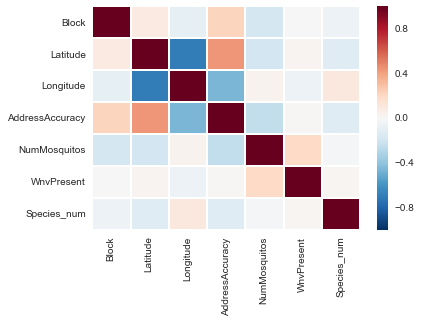

In [110]:
#correlation heat map to see if there is any relationship between features and the response value 

sns.heatmap(train.corr())

In [111]:
#create a new data frame with sum and max values of column "NumMosquitos' and "WnvPresent"
SumNumMosq=train.groupby(['Date','Address','Species','Trap','Latitude','Longitude'])[['NumMosquitos','WnvPresent']].agg([np.sum,np.max])




In [112]:
SumNumMosq=SumNumMosq.reset_index()


In [113]:
SumNumMosq.head(2)

Date                                      Address  \
                                                             
0  2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   
1  2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   

                  Species  Trap   Latitude  Longitude NumMosquitos       \
                                                               sum amax   
0  CULEX PIPIENS/RESTUANS  T048  41.867108 -87.654224            1    1   
1          CULEX RESTUANS  T048  41.867108 -87.654224            2    2   

  WnvPresent       
         sum amax  
0          0    0  
1          0    0

In [114]:
# add new columns 
SumNumMosq['VirusSum']=SumNumMosq['WnvPresent']['sum']
SumNumMosq['VirusMax']=SumNumMosq['WnvPresent']['amax']
SumNumMosq['MosqSum']=SumNumMosq['NumMosquitos']['sum']


In [115]:

#only keep columns we want 
SumNumMosq = SumNumMosq[[ 'Date','Address','Species','Trap','Latitude','Longitude','VirusSum', 'VirusMax', 'MosqSum']]


In [116]:
#only keep columns of interest
SumNumMosq.head(3)

,Date,Address,Species,Trap,Latitude,Longitude,VirusSum,VirusMax,MosqSum
,,,,,,,,,
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,0,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,T048,41.867108,-87.654224,0,0,2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,T091,41.862292,-87.648860,0,0,1


In [117]:
SumNumMosq.columns

MultiIndex(levels=[[u'NumMosquitos', u'WnvPresent', u'Longitude', u'Latitude', u'Trap', u'Species', u'Address', u'Date', u'VirusSum', u'VirusMax', u'MosqSum'], [u'sum', u'amax', u'']],
           labels=[[7, 6, 5, 4, 3, 2, 8, 9, 10], [2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [118]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_num
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0


In [119]:
SumNumMosq.head(1)

,Date,Address,Species,Trap,Latitude,Longitude,VirusSum,VirusMax,MosqSum
,,,,,,,,,
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,0,1


In [120]:

Newtrain= pd.merge(train,SumNumMosq,on=['Date','Address','Species','Trap','Latitude','Longitude'],how='inner')

AttributeError: 'numpy.ndarray' object has no attribute 'start'

In [17]:
SumNumMosq.corr()

,,Latitude,Longitude,VirusSum,VirusMax,MosqSum
,,,,,,
Latitude,,1.000000,-0.636842,0.018565,0.030862,-0.058984
Longitude,,-0.636842,1.000000,-0.068470,-0.076732,-0.001723
VirusSum,,0.018565,-0.068470,1.000000,0.806962,0.485083
VirusMax,,0.030862,-0.076732,0.806962,1.000000,0.233532
MosqSum,,-0.058984,-0.001723,0.485083,0.233532,1.000000


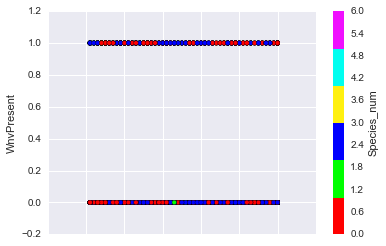

In [18]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFF00F','#00FFF0','#F00FFF'])
train.plot(kind='scatter', x='NumMosquitos', y='WnvPresent',c='Species_num',colormap=cmap_bold) 

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['NumMosquitos']
X = train[feature_cols]
y = train.WnvPresent
logreg.fit(X, y)
NumMosquitos_pred_class = logreg.predict(X)

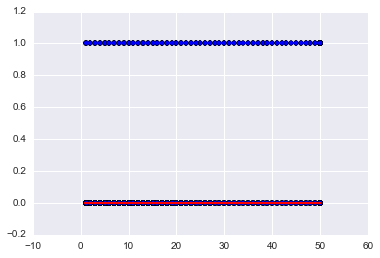

In [20]:
plt.scatter(train.NumMosquitos, train.WnvPresent)
plt.plot(train.NumMosquitos, NumMosquitos_pred_class, color='red')

In [21]:
weather.corr()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
Station,1.000000,0.016332,0.103995,0.007511,-0.007368,-0.016035
Tmax,0.016332,1.000000,0.859981,0.801733,-0.180596,0.029231
Tmin,0.103995,0.859981,1.000000,0.904358,-0.114755,-0.014283
DewPoint,0.007511,0.801733,0.904358,1.000000,-0.189207,0.003466
ResultSpeed,-0.007368,-0.180596,-0.114755,-0.189207,1.000000,0.096192
ResultDir,-0.016035,0.029231,-0.014283,0.003466,0.096192,1.000000


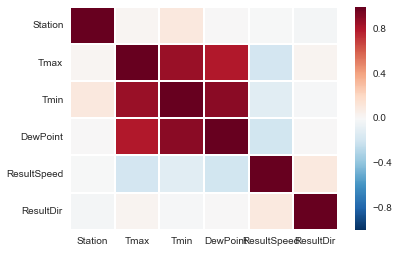

In [22]:
sns.heatmap(weather.corr())